<a href="https://colab.research.google.com/github/Mattshanevdberg/ML-FruitPunchAI_BootCamp/blob/main/Answers_3_1_Data_wrangling_and_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

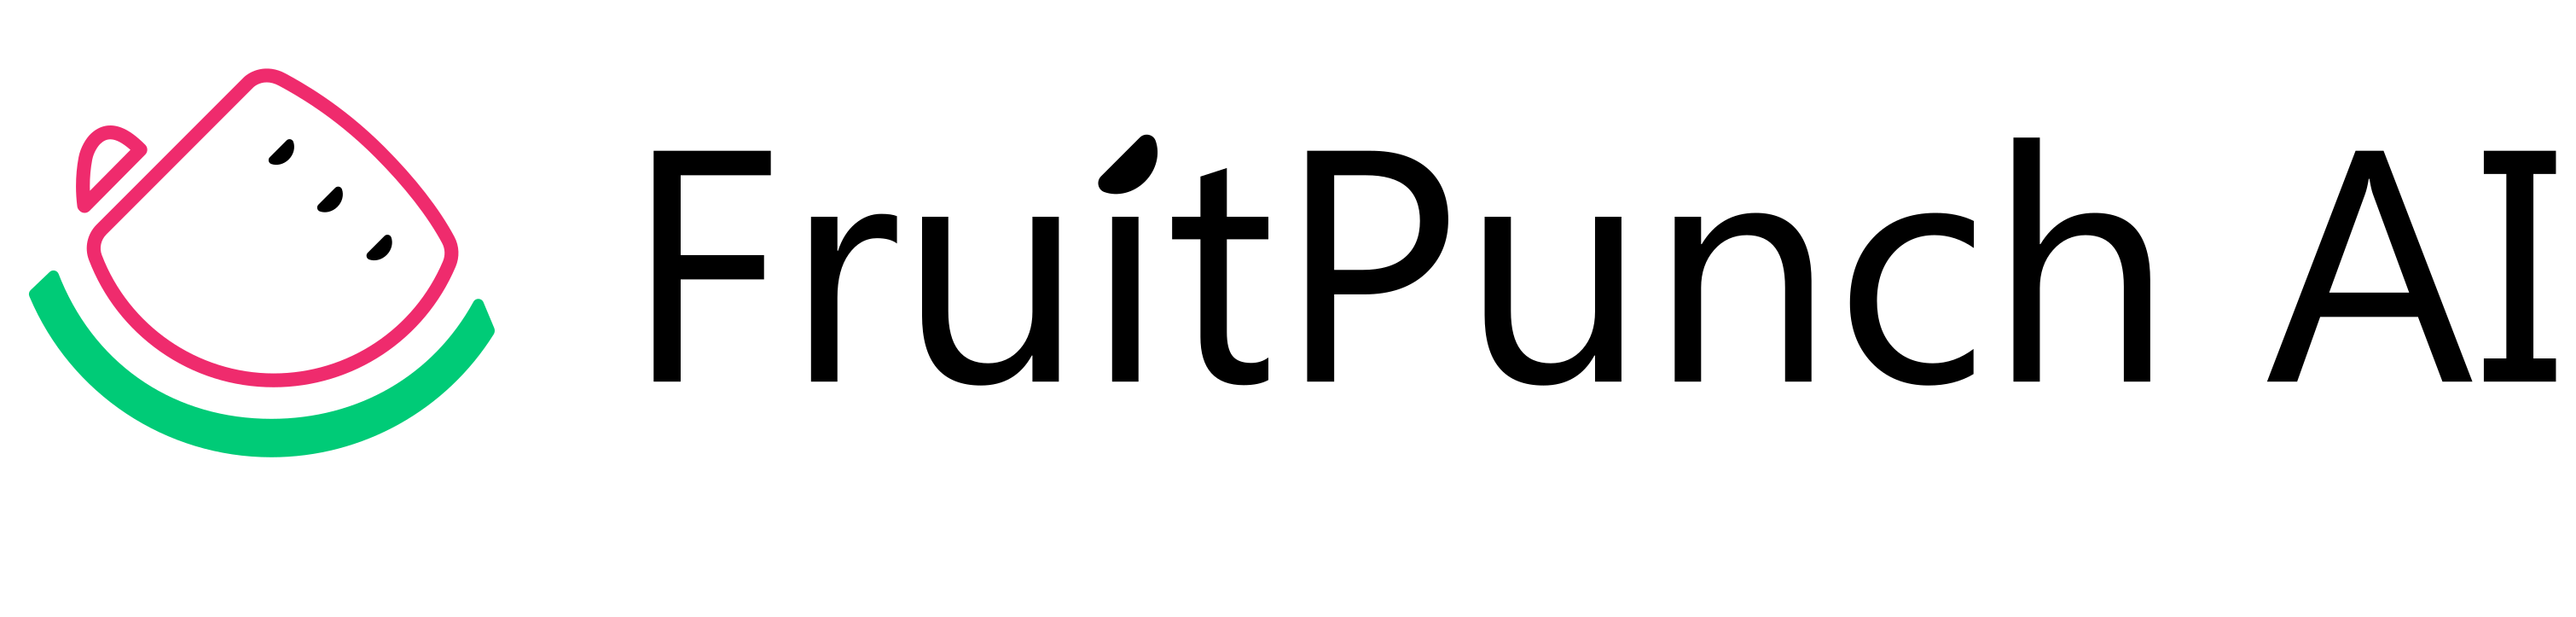

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


# Data Wrangling

For the first part of this notebook you will be playing around with the Diabetes dataset. 

In [ ]:

# If you run in to trouble with this command, take another one of the links above and try again

!gdown --id 19poGUSrTmdbEEvottmW1m4_g4XXUVJV-

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=19poGUSrTmdbEEvottmW1m4_g4XXUVJV-
To: /content/Diabetes.csv
100% 26.6M/26.6M [00:00<00:00, 120MB/s] 


## **Assignment**: Type casting

If you have a look at the Diabetes dataset a couple of things should catch your attention. First of all, there are a lot of string values. That is a problem for Machine Learning models since they can only process intergers (whole numbers) or floats (number with decimals). Second, a lot of values hold a question mark. Missing values can also have a big influence on your models.

1.1 How many missing values are there?

1.2 Convert all '?' into NaN values

1.3 Check again for missing values, how many are there now?

1.4 Drop columns that have more than 40000 missing values

In [ ]:
df = pd.read_csv('/content/Diabetes.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,'Caucasian','Female','[0-10)','?',6,25,1,1,...,'No','No','No','No','No','No','No','No','No','NO'
1,149190,55629189,'Caucasian','Female','[10-20)','?',1,1,7,3,...,'No','Up','No','No','No','No','No','Ch','Yes','>30'
2,64410,86047875,'AfricanAmerican','Female','[20-30)','?',1,1,7,2,...,'No','No','No','No','No','No','No','No','Yes','NO'
3,500364,82442376,'Caucasian','Male','[30-40)','?',1,1,7,2,...,'No','Up','No','No','No','No','No','Ch','Yes','NO'
4,16680,42519267,'Caucasian','Male','[40-50)','?',1,1,7,1,...,'No','Steady','No','No','No','No','No','Ch','Yes','NO'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
# Checking for missing values
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [ ]:
# Replace '?' with NaN and check again for missing values
df = df.replace("'?'", np.nan)
print(df.isnull().sum())
print('Total missing values:', df.isnull().sum().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])

Now that we got rid of most of the missing values we can do some quick Exploratory Data Analysis.

2.1 Plot the probability of readmitted for:
  - gender
  - race 
  - age

In [ ]:
values = {"'NO'": 0, "'>30'": 1, "'<30'": 1,                    # readmitted
          "'[0-10)'": 5, "'[10-20)'": 15, "'[20-30)'": 25,      # age
          "'[30-40)'": 35, "'[40-50)'": 45, "'[50-60)'": 55, 
          "'[60-70)'": 65, "'[70-80)'": 75, "'[80-90)'": 85, 
          "'[90-100)'": 95}                                 

df_0 = df.replace(values)

In [ ]:
df_new = df_0[df_0.gender != "'Unknown/Invalid'"]

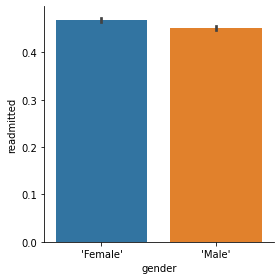

In [ ]:
gender = sns.catplot(x='gender', y="readmitted",
                data=df_new, kind="bar",
                height=4, aspect=1)

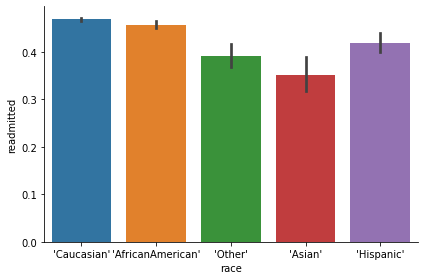

In [ ]:
race = sns.catplot(x='race', y="readmitted",
                data=df_new, kind="bar",
                height=4, aspect=1.5)

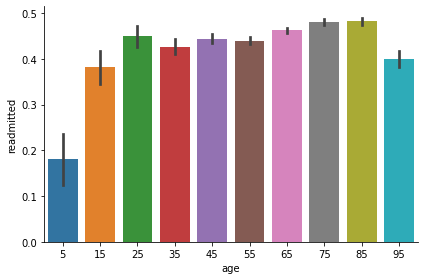

In [ ]:
age = sns.catplot(x='age', y="readmitted",
                data=df_0, kind="bar",
                height=4, aspect=1.5)

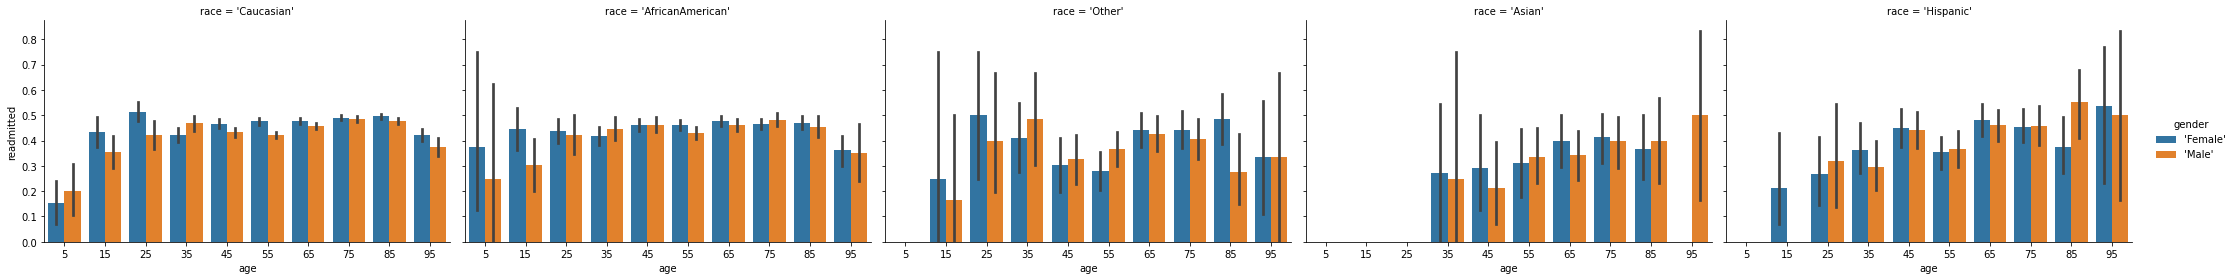

In [ ]:
all = sns.catplot(x='age', hue='gender', y='readmitted', col="race",
                data=df_new, kind="bar",
                height=4, aspect=1.5)

These graphs give us some insight into the data. But maybe we are not interested in all this information. Let's say we're doing research and only focus on 1 specific group. In order to train models on that group we need to create a subset of the data.

In [ ]:
# Example

African_American_males_over_60 = df_new[(df_new['gender'] == "'Male'") & (df_new['race'] == "'AfricanAmerican'") & (df_new['age'] > 60)]

African_American_males_over_60

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
11,36900,77391171,'AfricanAmerican','Male',65,2,1,4,7,62,...,'No','Steady','No','No','No','No','No','Ch','Yes',1
15,73578,86328819,'AfricanAmerican','Male',65,1,3,7,12,75,...,'No','Up','No','No','No','No','No','Ch','Yes',0
18,89682,107389323,'AfricanAmerican','Male',75,1,1,7,5,35,...,'No','Steady','No','No','No','No','No','No','Yes',1
31,253722,96664626,'AfricanAmerican','Male',75,1,5,7,1,53,...,'No','Down','No','No','No','No','No','Ch','Yes',1
76,964548,106469577,'AfricanAmerican','Male',65,1,1,7,1,58,...,'No','No','No','No','No','No','No','No','Yes',1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101709,443198486,29401542,'AfricanAmerican','Male',65,1,1,7,1,28,...,'No','Steady','No','No','No','No','No','Ch','Yes',1
101724,443698988,105807996,'AfricanAmerican','Male',65,6,6,17,7,91,...,'No','No','No','No','No','No','No','No','Yes',0
101739,443775740,30656952,'AfricanAmerican','Male',75,1,1,7,1,32,...,'No','Steady','No','No','No','No','No','No','Yes',0
101741,443787128,58160520,'AfricanAmerican','Male',95,1,3,7,4,21,...,'No','No','No','No','No','No','No','No','No',0


###Now it's your turn!

You can use the [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) to help you out.

3.1 Create a subset for women that are readmitted who had between 2 and 5 procedures

3.2 Create a subset for people that did not receive diabetes medication but did get readmitted

In [ ]:
readmitted_women = df_new[(df_new['gender'] == "'Female'") & (df_new['readmitted'] == 1) & (df_new['num_procedures'] >= 2) & (df_new['num_procedures'] <= 5)]

In [ ]:
readmitted_no_dia_meds = df_new[(df_new['readmitted'] == 1) & (df_new['diabetesMed'] == "'No'")]

In [ ]:
readmitted_no_dia_meds

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
23,183930,107400762,'Caucasian','Female',85,2,6,1,11,42,...,'No','No','No','No','No','No','No','No','No',1
50,550098,21820806,'AfricanAmerican','Male',55,2,1,2,4,40,...,'No','No','No','No','No','No','No','No','No',1
70,870294,95075649,'Caucasian','Female',75,1,6,7,7,75,...,'No','No','No','No','No','No','No','No','No',1
89,1157574,91181331,'Caucasian','Male',45,3,1,2,4,38,...,'No','No','No','No','No','No','No','No','No',1
105,1414158,48925980,'Caucasian','Male',85,1,6,7,2,34,...,'No','No','No','No','No','No','No','No','No',1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101650,442515896,85901769,'Caucasian','Female',65,1,1,1,1,30,...,'No','No','No','No','No','No','No','No','No',1
101655,442533620,84554370,'Caucasian','Female',65,2,6,1,4,52,...,'No','No','No','No','No','No','No','No','No',1
101664,442573442,41262156,'Caucasian','Male',55,1,1,7,4,51,...,'No','No','No','No','No','No','No','No','No',1
101682,442680734,85509108,'Caucasian','Male',75,1,3,7,5,63,...,'No','No','No','No','No','No','No','No','No',1


####Let's really start exploring!

In order to get a good understanding of your data Pandas provides a lot of handy tool. Use the Cheatsheet to answer the following questions:

4.1 What percetage of the male population does not use insulin?

4.2 What is the median age of people that get readmitted?

4.3 How old is the youngest caucasian female that uses diabetes meds?

4.4 What is the patient number of the Male African American with the highest number of lab procedures?

In [ ]:
male = df_new[(df_new['gender'] == "'Male'")]
print(male.insulin.value_counts())
print(round(len(male[(male['insulin'] == "'No'")])/len(male)*100,2), '%')

'No'        21883
'Steady'    14241
'Down'       5625
'Up'         5306
Name: insulin, dtype: int64
46.51 %


In [ ]:
readmitted = df_new[(df_new['readmitted'] == 1)]
readmitted.age.median()

65.0

In [ ]:
cauc_fem_diameds = df_new[(df_new['race'] == "'Caucasian'") & (df_new['gender'] == "'Female'") & (df_new['diabetesMed'] == "'Yes'")]
cauc_fem_diameds.age.min()

5

In [ ]:
male_afram = df_new[(df_new['race'] == "'AfricanAmerican'") & (df_new['gender'] == "'Male'")]
print(male_afram.num_lab_procedures.max())
person = male_afram[(male_afram['num_lab_procedures'] == 132)]
person.iat[0,1] 

132


95506623

## Time series 

Working with dates and time can be confusing for computers. Luckily Pandas comes with a very usefull feature: Datetime type

to demostrate this we will use a snapshot for a weatherstation

In [ ]:
# Load the occupancy dataset

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip

--2022-06-14 09:52:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335713 (328K) [application/x-httpd-php]
Saving to: ‘occupancy_data.zip’

occupancy_data.zip  100%[===================>] 327.84K  1014KB/s    in 0.3s    

2022-06-14 09:52:20 (1014 KB/s) - ‘occupancy_data.zip’ saved [335713/335713]



In [ ]:
# Unzip the files
!unzip '/content/occupancy_data.zip' -d '/content'

Archive:  /content/occupancy_data.zip
  inflating: /content/datatest.txt   
  inflating: /content/datatest2.txt  
  inflating: /content/datatraining.txt  


In [ ]:
weather = pd.read_csv('/content/datatest.txt')
weather

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


#### Working with date/time variables

5.1 Create a subset for the 3rd of February 2015

5.2 Plot the HumidityRatio over time

5.3 Use pd.DateTimeIndex() and take another look at the data

5.4 Try the same plot again and see if anything changed


In [ ]:
feb_3 = weather[(weather['date'] > '2015-02-03') & (weather['date'] < '2015-02-04')]
feb_3

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
721,2015-02-03 00:00:00,20.600000,22.20,0.0,451.500000,0.003325,0
722,2015-02-03 00:01:00,20.600000,22.20,0.0,455.250000,0.003325,0
723,2015-02-03 00:02:00,20.600000,22.20,0.0,455.250000,0.003325,0
724,2015-02-03 00:03:00,20.633333,22.23,0.0,451.666667,0.003337,0
725,2015-02-03 00:04:00,20.600000,22.20,0.0,451.000000,0.003325,0
...,...,...,...,...,...,...,...
2156,2015-02-03 23:55:00,20.890000,24.89,0.0,547.750000,0.003798,0
2157,2015-02-03 23:55:59,20.890000,24.89,0.0,547.250000,0.003798,0
2158,2015-02-03 23:57:00,20.890000,24.89,0.0,551.500000,0.003798,0
2159,2015-02-03 23:57:59,20.890000,24.89,0.0,554.000000,0.003798,0


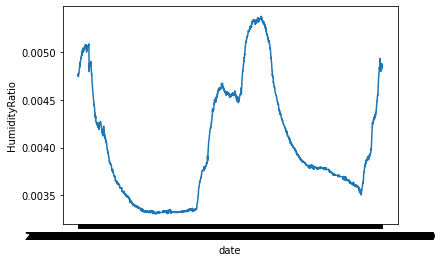

In [ ]:
plot = sns.lineplot(data=weather, x = 'date', y = 'HumidityRatio')

In [ ]:
weather.index = pd.DatetimeIndex(weather['date'])

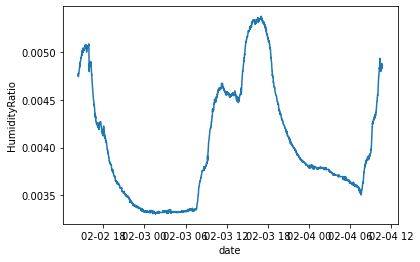

In [ ]:
plot = sns.lineplot(data=weather.HumidityRatio)